In [1]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.data_loader import DataLoader

print("📊 Starting Last-Mile Delivery Analysis")
print("=" * 50)

📊 Starting Last-Mile Delivery Analysis


In [2]:
# Load delivery data
loader = DataLoader()
df = loader.create_sample_data()

# Basic data overview
print(f"📦 Dataset Overview:")
print(f"Total deliveries: {len(df):,}")
print(f"Dataset shape: {df.shape}")
print(f"Success rate: {df['delivery_success'].mean():.1%}")

# Show first few records
print(f"\n📋 First 5 delivery records:")
df.head()

INFO:data.data_loader:DataLoader initialized
INFO:data.data_loader:Creating sample delivery data...
INFO:data.data_loader:Created 1000 sample delivery records


📦 Dataset Overview:
Total deliveries: 1,000
Dataset shape: (1000, 5)
Success rate: 95.1%

📋 First 5 delivery records:


,delivery_id,route_id,city,delivery_success,delivery_time_minutes
0,D_000001,R_052,Munich,True,12.827213
1,D_000002,R_093,Hamburg,True,0.451758
2,D_000003,R_015,Hamburg,True,16.878358
3,D_000004,R_072,Berlin,True,0.688359
4,D_000005,R_061,Munich,True,8.983846


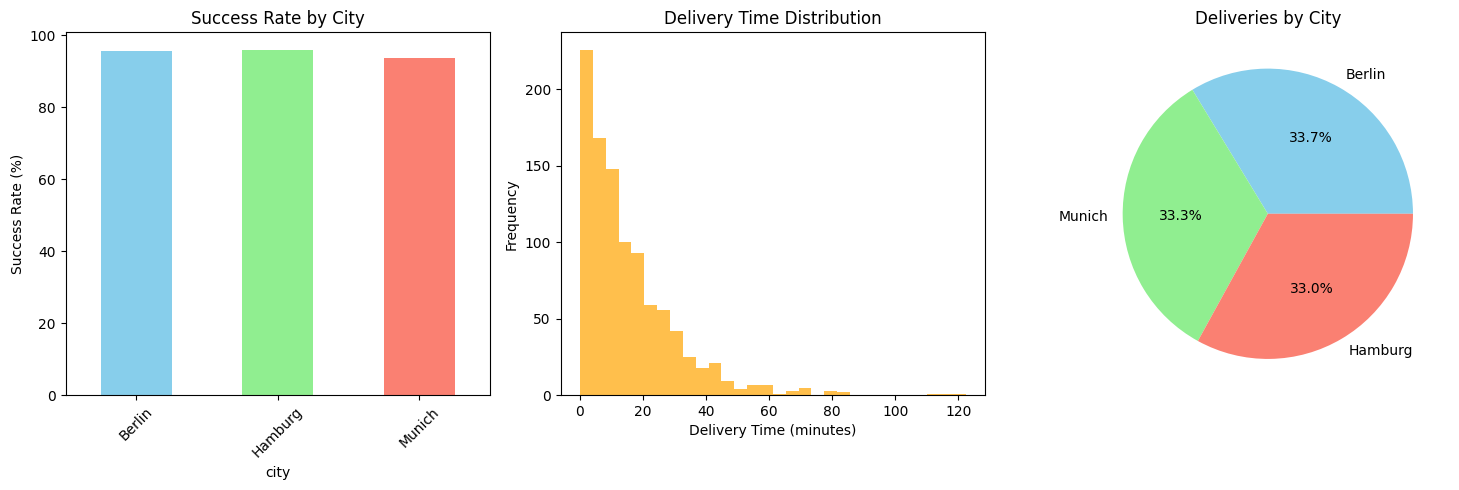

📈 Visualization created successfully!


In [4]:
# Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.figure(figsize=(15, 5))

# Subplot 1: Success rate by city
plt.subplot(1, 3, 1)
city_success = df.groupby('city')['delivery_success'].mean() * 100
city_success.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Success Rate by City')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

# Subplot 2: Delivery time distribution
plt.subplot(1, 3, 2)
plt.hist(df['delivery_time_minutes'], bins=30, alpha=0.7, color='orange')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Subplot 3: Number of deliveries by city
plt.subplot(1, 3, 3)
city_counts = df['city'].value_counts()
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Deliveries by City')

plt.tight_layout()
plt.show()

print("📈 Visualization created successfully!")

In [5]:
# Summary analysis and insights
print("🔍 DELIVERY PERFORMANCE INSIGHTS")
print("=" * 50)

# Calculate key metrics
total_deliveries = len(df)
success_rate = df['delivery_success'].mean() * 100
avg_delivery_time = df['delivery_time_minutes'].mean()
failed_deliveries = len(df[df['delivery_success'] == False])

print(f"📊 Key Performance Indicators:")
print(f"   • Total Deliveries: {total_deliveries:,}")
print(f"   • Overall Success Rate: {success_rate:.1f}%")
print(f"   • Failed Deliveries: {failed_deliveries}")
print(f"   • Average Delivery Time: {avg_delivery_time:.1f} minutes")

# City-wise breakdown
print(f"\n🏙️ City Performance Breakdown:")
city_stats = df.groupby('city').agg({
    'delivery_success': ['count', 'sum', 'mean'],
    'delivery_time_minutes': 'mean'
}).round(2)

for city in df['city'].unique():
    city_data = df[df['city'] == city]
    count = len(city_data)
    success = city_data['delivery_success'].mean() * 100
    avg_time = city_data['delivery_time_minutes'].mean()
    print(f"   • {city}: {count} deliveries, {success:.1f}% success, {avg_time:.1f}min avg")

print(f"\n💡 Business Recommendations:")
print(f"   • Focus on improving delivery times in cities with longer averages")
print(f"   • Investigate causes of the {100-success_rate:.1f}% failure rate")
print(f"   • Consider route optimization to reduce delivery times")
print(f"\n✅ Analysis Complete!")

🔍 DELIVERY PERFORMANCE INSIGHTS
📊 Key Performance Indicators:
   • Total Deliveries: 1,000
   • Overall Success Rate: 95.1%
   • Failed Deliveries: 49
   • Average Delivery Time: 15.5 minutes

🏙️ City Performance Breakdown:
   • Munich: 333 deliveries, 93.7% success, 14.9min avg
   • Hamburg: 330 deliveries, 96.1% success, 15.6min avg
   • Berlin: 337 deliveries, 95.5% success, 16.0min avg

💡 Business Recommendations:
   • Focus on improving delivery times in cities with longer averages
   • Investigate causes of the 4.9% failure rate
   • Consider route optimization to reduce delivery times

✅ Analysis Complete!
